<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch7_Dashboards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainnumeric.xlsx')

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/CRMclean.xlsx', sheet_name="Sheet1")

## Divergent Stacked Bar Chart

In [ ]:
from pandas import crosstab
import matplotlib.pyplot as plt

In [ ]:
bar_23 = crosstab(index=df2['Q23'], columns= df2["Q18"], normalize="index")
print(bar_23)

Q18         1         2         3         4         5
Q23                                                  
1    0.000000  0.000000  0.444444  0.555556  0.000000
2    0.181818  0.227273  0.454545  0.136364  0.000000
3    0.000000  0.000000  0.217391  0.739130  0.043478


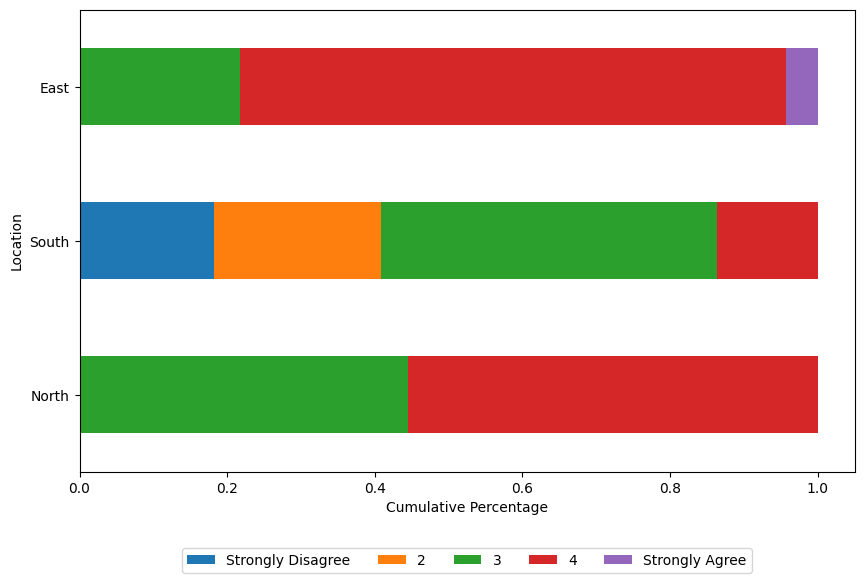

In [ ]:
bar_23.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Location")
plt.xlabel("Cumulative Percentage")
plt.yticks([0, 1, 2], ["North", "South", "East"])
plt.legend(["Strongly Disagree", "2", "3", "4", "Strongly Agree"],
	loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()

In [ ]:
middles = bar_23[[1, 2]].sum(axis=1)+bar_23[3]*.5
longest = middles.max()
complete_longest = bar_23.sum(axis=1).max()
bar_23.insert(0, '', (middles - longest).abs())

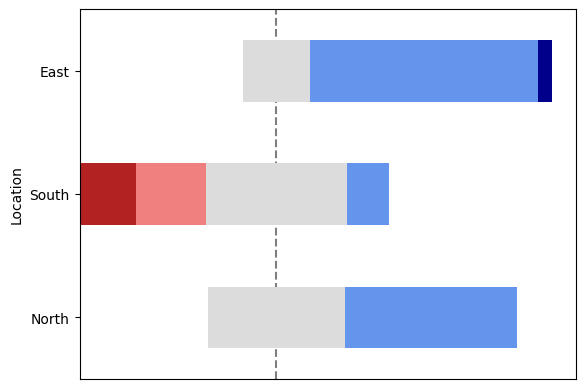

In [ ]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
bar_23.plot(kind='barh', stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.ylabel("Location")
plt.yticks([0, 1, 2], ["North", "South", "East"])
plt.xticks([], [])
plt.show()

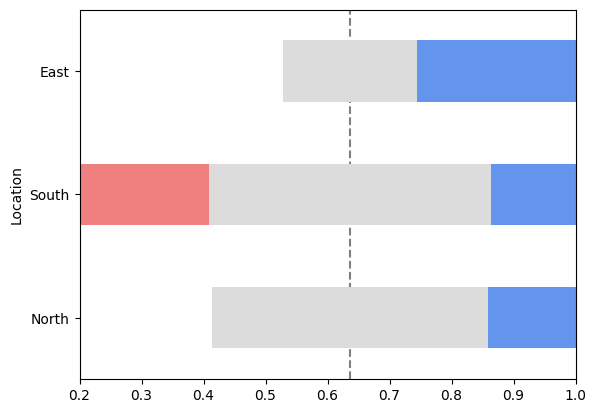

In [ ]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
bar_23.plot(kind='barh', stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)
plt.ylabel("Location")
plt.yticks([0, 1, 2], ["North", "South", "East"])
plt.xlim(0.2, 1)
plt.show()

## Sankey Diagrams

Data from Apple Stocks at Market Watch https://www.marketwatch.com/investing/stock/aapl/financials

In [ ]:
df5 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 7/sankey.xlsx')

In [ ]:
df5

,Source,Target,Value
0,Revenue,Gross Profit,170
1,Revenue,Cost of Revenue,224
2,Gross Profit,EBIT,119
3,Gross Profit,R&D,51
4,EBIT,Net Profit,119
5,Net Operating Income/Expenses,Net Profit,3
6,Net Profit,Net Profit After Taxes,103
7,Net Profit,Taxes,19


In [ ]:
import pandas as pd
import holoviews as hv

In [ ]:
%env HV_DOC_HTML=true

env: HV_DOC_HTML=true


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
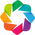

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.



:Sankey   [Source,Target]   (Value)

In [ ]:
hv.extension('bokeh')
sankey = hv.Sankey(df5, label="Apple")
sankey.opts(label_position='left', edge_color="Target", node_color="index")

### In Plotly

In [ ]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [ ]:
source = df5["Source"].values.tolist()
target = df5["Target"].values.tolist()
value = df5["Value"].values.tolist()

In [ ]:
labels = ["Revenue", "Gross Profit", "Cost of Revenue", "Net Operating Income/Expenses", "EBIT", "R&D", "Net Profit", "Net Profit After Taxes", "Taxes"]

In [ ]:
node=dict(label=labels, pad=15, thickness=5)

In [ ]:
link = dict(source=source, target=target, value=value, color=["green","gold","red", "blue", "teal"]*len(source))

In [ ]:
chart = go.Sankey(link=link, node=node, arrangement="snap")
fig = go.Figure(chart)
fig.show()

## Gauge

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 390,
    mode = "gauge+number+delta",
    title = {'text': "Sales"},
    delta = {'reference': 300},
    gauge = {'axis': {'range': [None, 600]},
             'steps' : [
                 {'range': [0, 250], 'color': "lightgray"},
                 {'range': [250, 500], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 550}}))

fig.show()

## Dashboard

In [ ]:
!pip install dash

In [ ]:
df3.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Smith,288389,Consulting,8790,2023-03-01,Contacted,25,46,0.8,35,...,2023-05-03,Contacted,30.0,46.0,0.9,35.0,2.0,Neutral,Average,Email
1,Smith,287515,Consulting,9252,2023-03-01,Demo,32,44,0.9,55,...,2023-05-07,Demo,40.0,42.0,1.2,55.0,5.0,Positive,Very Good,Phone
2,Garcia,388664,Info and Culture,12723,2023-03-02,Contacted,35,45,1.5,50,...,2023-05-05,Contacted,50.0,46.0,1.4,69.0,7.0,Neutral,At Churn Risk,Email
3,Chen,281026,Consulting,9740,2023-03-02,Contacted,35,30,0.5,65,...,2023-05-06,Demo,30.0,37.0,1.5,50.0,4.0,Positive,Good,Email
4,Smith,354030,Ecommerce,13563,2023-03-02,Proposal,47,42,1.1,60,...,2023-05-09,Negotiations,45.0,41.0,1.3,42.0,4.0,Positive,Good,Phone


In [ ]:
df3 = df3.rename(columns={"Q1": "Salesperson", "Q7": "Percent Listen", "Q8": "Talking Speed","Q9": "Avg Pause", "Q10": "Monologue"})

In [ ]:
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    html.Div(children='Customer Relationship'),
    html.Hr(),
    dcc.RadioItems(options=["Percent Listen", "Talking Speed", "Avg Pause", "Monologue"], value="Percent Listen", id='controls-and-radio-item'),
    dash_table.DataTable(data=df3[["Salesperson", "Percent Listen", "Talking Speed", "Avg Pause", "Monologue"]].sort_values(by=["Salesperson"]).to_dict('records'), page_size=10),
    dcc.Graph(figure={}, id='controls-and-graph')
])

@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)

def update_graph(col_chosen):
    fig = px.histogram(df3, x='Salesperson', y=col_chosen, histfunc='avg')
    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8888)

<IPython.core.display.Javascript object>

In [ ]:
from pandas import crosstab
import plotly.graph_objects as go

In [ ]:
scc = pd.crosstab(df3["Salesperson"],df3["Q6"])

In [ ]:
scc

Q6,Contacted,Demo,Negotiations,Proposal,Qualified
Salesperson,,,,,
Chen,6,2,3,2,2
Devi,4,3,2,1,2
Garcia,10,3,0,2,2
Mensah,14,3,1,3,5
Smith,7,4,2,4,3
Taylor,9,5,1,2,2
Zhao,11,3,1,4,7


In [ ]:
data = []
for x in scc.columns:
   data.append(go.Bar(name=str(x), x=scc.index, y=scc[x]))
figure = go.Figure(data)
figure.update_layout(barmode = 'stack')

In [ ]:
from dash import Dash, html, dcc, callback, Output, Input, dash_table, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Salesperson Performance'),

    html.Div(className='row', children=''),
    html.Hr(),
    dcc.RadioItems(options=["Percent Listen", "Talking Speed", "Avg Pause", "Monologue"], value="Percent Listen", id='controls-and-radio-item'),
    dcc.Graph(figure={}, id='controls-and-graph'),

    html.Div(className='row', children=''),
    dcc.Graph(id='Relationship', figure=figure)
])

@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)

def update_graph(col_chosen):
    fig = px.histogram(df3, x='Salesperson', y=col_chosen, histfunc='avg')
    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8888)

<IPython.core.display.Javascript object>